In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import seaborn as sn
from tensorflow.keras import regularizers
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#uploading dataset
!unzip gdrive/My\ Drive/ASP_jusan/ASP_jusan.zip> /dev/null
train_path='ASP_jysan/train_data.csv'
train_path= pathlib.Path(train_path)

replace ASP_jysan/test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace ASP_jysan/train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
train_df= pd.read_csv(train_path)


In [ ]:
#creating dataframe 
train_df=train_df.drop('client_id',axis=1)
train_df=train_df.drop('transactions_amount_9',axis=1)
train_df=train_df.drop('transactions_count_9',axis=1)
train_df=train_df.drop('transactions_amount_10',axis=1)
train_df=train_df.drop('transactions_count_10',axis=1)
train_df=train_df.drop('transfers_amount_in_8',axis=1)
train_df=train_df.drop('transfers_count_in_8',axis=1)
train_df=train_df.drop('transfers_amount_out_8',axis=1)
train_df=train_df.drop('transfers_count_out_8',axis=1)
train_df.head()
train_df=train_df.replace(np.nan,0)

In [ ]:
tr_df=pd.DataFrame()
check=0
for i in range (941530):
  if train_df['label'][i]==0 and i%100!=0:
    check=check+1
  if train_df['label'][i]==0 and i%100!=0:
    continue
  tr_df=tr_df.append(train_df.iloc[i],ignore_index = True)
train_df=tr_df


In [ ]:
train_df=tr_df


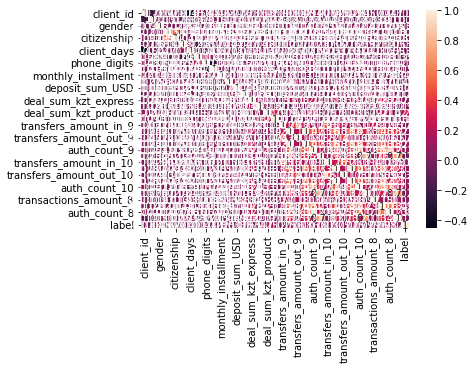

In [ ]:
corr_matrix=train_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
temp=[]
temp_2=[]
temp_3=[]
corr_keys=corr_matrix.keys()
for ii in range (33):
  corr_temp=corr_matrix[corr_keys[ii]]
  for i in range (33):
    if corr_temp[i]>=0.5 and ii!=i:
      temp.append(corr_temp.keys()[i])
      temp_2.append(corr_temp[i])
      temp_3.append(corr_temp.keys()[ii])

In [ ]:
train_df=train_df.drop('salary_9',axis=1)
train_df=train_df.drop('country',axis=1)
train_df=train_df.drop('date_close',axis=1)
train_df=train_df.drop('deal_start_date_express',axis=1)
train_df=train_df.drop('plan_end_date_express',axis=1)
train_df=train_df.drop('deal_start_date_product',axis=1)
train_df=train_df.drop('plan_end_date_product',axis=1)


In [ ]:
train_df.head()
val_df = train_df.iloc[17000:,:]
train_df = train_df.iloc[:17000,:]

In [ ]:
train_df.head()

temp_df = train_df.iloc[:,:-1]
label_df = train_df.iloc[:,-1]

train_ds = tf.convert_to_tensor(temp_df)
label_train = tf.convert_to_tensor(label_df)

input=tf.data.Dataset.from_tensor_slices((train_ds, label_train))

input_ds = input.shuffle(1000).batch(32)

In [ ]:
temp_df = val_df.iloc[:,:-1]
label_val_df = val_df.iloc[:,-1]

val_ds = tf.convert_to_tensor(temp_df)
label_val = tf.convert_to_tensor(label_val_df)

val=tf.data.Dataset.from_tensor_slices((val_ds, label_val))

val_ds = val.shuffle(1000).batch(32)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer((31,)),
  tf.keras.layers.Dense(8, activation='swish', kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.07)),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
savepoint= ModelCheckpoint(
    "gdrive/My Drive/model/checpoint/temp",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)

In [ ]:
model.compile(
  optimizer='RMSprop',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
  metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
history1=model.fit(
  input_ds,
  validation_data = val_ds,
  epochs=10,
  callbacks=savepoint
)

Epoch 1/10
531/532 [============================>.] - ETA: 0s - loss: 6.0844 - precision_17: 0.5739 - recall_17: 0.6681
Epoch 1: val_loss improved from inf to 0.80418, saving model to gdrive/My Drive/model/checpoint/temp
532/532 [==============================] - 3s 5ms/step - loss: 6.0819 - precision_17: 0.5739 - recall_17: 0.6682 - val_loss: 0.8042 - val_precision_17: 0.5793 - val_recall_17: 0.9979
Epoch 2/10
530/532 [============================>.] - ETA: 0s - loss: 0.9781 - precision_17: 0.5728 - recall_17: 0.9854
Epoch 2: val_loss did not improve from 0.80418
532/532 [==============================] - 2s 3ms/step - loss: 0.9773 - precision_17: 0.5731 - recall_17: 0.9854 - val_loss: 0.8237 - val_precision_17: 0.5791 - val_recall_17: 0.9979
Epoch 3/10
517/532 [============================>.] - ETA: 0s - loss: 0.8024 - precision_17: 0.5729 - recall_17: 0.9858
Epoch 3: val_loss improved from 0.80418 to 0.67631, saving model to gdrive/My Drive/model/checpoint/temp
532/532 [============

In [ ]:
test_path='ASP_jysan/test_data.csv'
test_path= pathlib.Path(test_path)
test_df= pd.read_csv(test_path)
client_id=test_df['client_id']
test_df=test_df.drop('client_id',axis=1)
test_df=test_df.drop('transactions_amount_9',axis=1)
test_df=test_df.drop('transactions_count_9',axis=1)
test_df=test_df.drop('transactions_amount_10',axis=1)
test_df=test_df.drop('transactions_count_10',axis=1)
test_df=test_df.drop('transfers_amount_in_8',axis=1)
test_df=test_df.drop('transfers_count_in_8',axis=1)
test_df=test_df.drop('transfers_amount_out_8',axis=1)
test_df=test_df.drop('transfers_count_out_8',axis=1)
test_df.head()
test_df=test_df.replace(np.nan,0)
test_df=test_df.drop('salary_9',axis=1)
test_df=test_df.drop('country',axis=1)
test_df=test_df.drop('date_close',axis=1)
test_df=test_df.drop('deal_start_date_express',axis=1)
test_df=test_df.drop('plan_end_date_express',axis=1)
test_df=test_df.drop('deal_start_date_product',axis=1)
test_df=test_df.drop('plan_end_date_product',axis=1)

In [ ]:
#temp_df = test_df.iloc[:,:-1]
#label_test_df = test_df.iloc[:,-1]

test_ds = tf.convert_to_tensor(test_df)
#label_test = tf.convert_to_tensor(label_test_df)

test=tf.data.Dataset.from_tensor_slices((test_ds))
test_ds = test.batch(32)

In [ ]:
loaded_model = tf.keras.models.load_model('gdrive/My Drive/model/checpoint/temp')

predicted_labels=loaded_model.predict(test_ds)



14492/14492 [==============================] - 65s 4ms/step


In [ ]:
predicted_labels[1][0]

0.5521154

In [ ]:
class_names = [0,1]
#score = tf.nn.softmax(predicted_labels)

predictions=np.argmax(score)
for i in range (463739):
  predicted_labels[i] = np.argmax(score[i][0])

In [ ]:
end_df = pd.DataFrame()
end_df['id'] = client_id
end_df['target'] =predicted_labels

In [ ]:
final_df=pd.DataFrame()
for i in range (463739):
  if end_df['target'][i]==1:
      final_df=final_df.append(end_df.iloc[i],ignore_index = True)
end_df=final_df

In [ ]:
end_df

""


In [ ]:
end_df.to_csv()

""
